In [ ]:
!nvidia-smi

Sat Nov  2 08:14:05 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off | 00000000:00:04.0 Off |                    0 |
| N/A   31C    P0              44W / 400W |      2MiB / 40960MiB |      0%      Default |
|                                         |                      |             Disabled |
+-----------------------------------------+----------------------+--

In [ ]:
!ls '/content/drive/MyDrive/Colab Notebooks'

'1675935386_801__Assignment-2 (1).ipynb'   'hw3 (1).ipynb'	     'lab3_ipynb (1).ipynb'
 1675935386_801__Assignment-2.ipynb	    hw3.ipynb		      lab3_ipynb.ipynb
 410hw2.ipynb				    hw4.ipynb		      lab3_QQ.ipynb
 A3_Logistic_Regression-1.ipynb		   'lab2(1)(1).ipynb'	     'project (1).ipynb'
 A4_Neural_Network_One_Hidden_Layer.ipynb  'lab2_1 (1).ipynb'	     'project (2).ipynb'
 alexnet.ipynb				    lab2_1.ipynb	     'project (4).ipynb'
 cmpt726_sp24_a2_Bayesian.ipynb		   'lab2 (2)(1).ipynb'	      project.ipynb
 cmpt726_sp24_a2_NonOpt.ipynb		    lab2.ipynb		      Untitled
 cmpt726_sp24_a2_OLS.ipynb		   'lab3 (1).ipynb'	      Untitled0.ipynb
 CNN.ipynb				   '“lab3 (1).ipynb”的副本'   Untitled1.ipynb
 datagenerator.py			   'lab3 (2).ipynb'


In [ ]:
import os
from torch.utils.data import Dataset
from PIL import Image

class InsectDataset(Dataset):
    def __init__(self, txt_file, root_dir, transform=None, limit=None):
        self.data = []
        self.root_dir = root_dir
        self.transform = transform
        with open(txt_file, 'r') as file:
            lines = file.readlines()
            if limit:
                lines = lines[:limit]  # 限制加载的样本数
            for line in lines:
                img_name, label = line.strip().split()
                self.data.append((img_name, int(label)))

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img_name, label = self.data[idx]
        img_path = os.path.join(self.root_dir, img_name)
        image = Image.open(img_path).convert('RGB')
        if self.transform:
            image = self.transform(image)
        return image, label


In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import torch.nn.functional as F
from torchsummary import summary
#from datagenerator import InsectDataset
from torch.utils.data import DataLoader

类别 0 样本数量: 669
类别 1 样本数量: 292
类别 2 样本数量: 156
类别 3 样本数量: 631
类别 4 样本数量: 302
类别 5 样本数量: 303
类别 6 样本数量: 221
类别 7 样本数量: 500
类别 8 样本数量: 535
类别 9 样本数量: 331
类别 10 样本数量: 513
类别 11 样本数量: 242
类别 12 样本数量: 103
类别 13 样本数量: 245
类别 14 样本数量: 516
类别 15 样本数量: 989
类别 16 样本数量: 532
类别 17 样本数量: 88
类别 18 样本数量: 512
类别 19 样本数量: 294
类别 20 样本数量: 287
类别 21 样本数量: 317
类别 22 样本数量: 1018
类别 23 样本数量: 642
类别 24 样本数量: 2456
类别 25 样本数量: 339
类别 26 样本数量: 414
类别 27 样本数量: 392
类别 28 样本数量: 195
类别 29 样本数量: 424
类别 30 样本数量: 291
类别 31 样本数量: 139
类别 32 样本数量: 147
类别 33 样本数量: 175
类别 34 样本数量: 203
类别 35 样本数量: 82
类别 36 样本数量: 62
类别 37 样本数量: 473
类别 38 样本数量: 513
类别 39 样本数量: 962
类别 40 样本数量: 179
类别 41 样本数量: 162
类别 42 样本数量: 184
类别 43 样本数量: 114
类别 44 样本数量: 314
类别 45 样本数量: 639
类别 46 样本数量: 393
类别 47 样本数量: 492
类别 48 样本数量: 836
类别 49 样本数量: 392
类别 50 样本数量: 845
类别 51 样本数量: 1138
类别 52 样本数量: 156
类别 53 样本数量: 106
类别 54 样本数量: 527
类别 55 样本数量: 111
类别 56 样本数量: 281
类别 57 样本数量: 228
类别 58 样本数量: 840
类别 59 样本数量: 212
类别 60 样本数量: 105
类别 61 样本数量: 47
类别 62 样本数量: 169
类别 

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26679 (\N{CJK UNIFIED IDEOGRAPH-6837}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26412 (\N{CJK UNIFIED IDEOGRAPH-672C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25454 (\N{CJK UNIFIED IDEOGRAPH-636E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

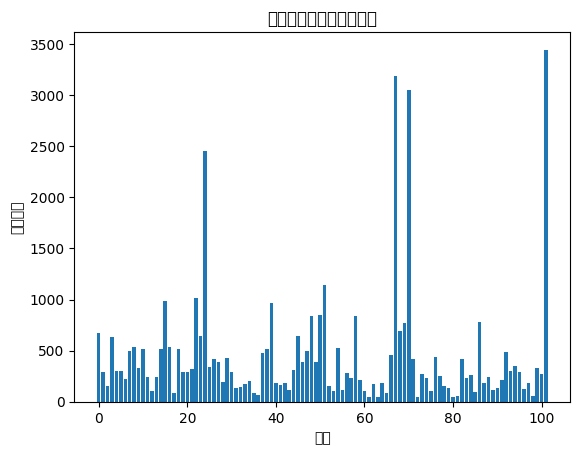

In [ ]:
from collections import Counter

# 统计类别样本数量
label_counts = Counter()
with open('/content/drive/Othercomputers/我的计算机/Classification/ip102_v1.1/ip102_v1.1/train.txt', 'r') as f:
    for line in f:
        _, label = line.strip().split()  # 假设每行格式为 "image_name class_label"
        label_counts[int(label)] += 1

# 打印每个类别的样本数量
for label, count in label_counts.items():
    print(f'类别 {label} 样本数量: {count}')

# 可视化样本数量
import matplotlib.pyplot as plt

plt.bar(label_counts.keys(), label_counts.values())
plt.xlabel('类别')
plt.ylabel('样本数量')
plt.title('数据集类别样本数量分布')
plt.show()


In [ ]:
# transform = transforms.Compose([
#     #     transforms.CenterCrop(224),
#         transforms.RandomCrop(32,padding=4), # 数据增广
#         transforms.RandomHorizontalFlip(),  # 数据增广
#         transforms.ToTensor(),
#         transforms.Normalize((0.5140, 0.5406, 0.3882), (0.1888, 0.1875, 0.1879))
#     ])
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # 调整图像尺寸为 224x224
    transforms.RandomHorizontalFlip(),  # 数据增广
    transforms.ToTensor(),
    transforms.Normalize((0.5140, 0.5406, 0.3882), (0.1888, 0.1875, 0.1879))
])


# 定义自定义数据集
trainset = InsectDataset('/content/drive/Othercomputers/我的计算机/Classification/ip102_v1.1/ip102_v1.1/train.txt',
                        '/content/drive/Othercomputers/我的计算机/Classification/ip102_v1.1/ip102_v1.1/images',
                        transform=transform,limit=10000)

testset = InsectDataset('/content/drive/Othercomputers/我的计算机/Classification/ip102_v1.1/ip102_v1.1/test.txt',
                        '/content/drive/Othercomputers/我的计算机/Classification/ip102_v1.1/ip102_v1.1/images',
                        transform=transform,limit=10000)

# 数据加载器
Batch_Size = 128
trainloader = DataLoader(trainset, batch_size=Batch_Size, shuffle=True, num_workers=2)
testloader = DataLoader(testset, batch_size=Batch_Size, shuffle=True, num_workers=2)


# 读取 classes.txt 文件并提取类别名称
classes = []
with open('/content/drive/Othercomputers/我的计算机/Classification/classes.txt', 'r', encoding='utf-8') as f:
    for line in f:
        parts = line.strip().split(' ', 1)  # 使用空格分割，最多分割一次
        if len(parts) == 2:  # 确保行包含两个部分
            _, class_name = parts
            classes.append(class_name)
        else:
            print(f"跳过无法解析的行: {line.strip()}")


# 打印类别名称
# print(classes)


# 查看类别名称和类别索引映射
print("类别名称列表:")
print(classes)

# 创建类别到索引的映射字典（如果需要）
class_to_idx = {name: idx for idx, name in enumerate(classes)}
print("类别到索引的映射:")
print(class_to_idx)

# 查看 `trainloader` 中的一个批次数据
for images, labels in trainloader:
    print(f"图像批次的形状: {images.shape}")  # 输出图像的形状，例如: torch.Size([256, 3, 32, 32])
    print(f"标签批次的形状: {labels.shape}")  # 输出标签的形状，例如: torch.Size([256])
    print(f"标签批次内容: {labels}")  # 输出标签内容
    break  # 只查看第一个批次，避免输出过多


类别到索引的映射:
{' rice leaf roller': 0, ' rice leaf caterpillar': 1, ' paddy stem maggot': 2, ' asiatic rice borer': 3, ' yellow rice borer': 4, ' rice gall midge': 5, ' Rice Stemfly': 6, ' brown plant hopper': 7, ' white backed plant hopper': 8, 'small brown plant hopper': 9, 'rice water weevil': 10, 'rice leafhopper': 11, 'grain spreader thrips': 12, 'rice shell pest': 13, 'grub': 14, 'mole cricket': 15, 'wireworm': 16, 'white margined moth': 17, 'black cutworm': 18, 'large cutworm': 19, 'yellow cutworm': 20, 'red spider': 21, 'corn borer': 22, 'army worm': 23, 'aphids': 24, 'Potosiabre vitarsis': 25, 'peach borer': 26, 'english grain aphid': 27, 'green bug': 28, 'bird cherry-oataphid': 29, 'wheat blossom midge': 30, 'penthaleus major': 31, 'longlegged spider mite': 32, 'wheat phloeothrips': 33, 'wheat sawfly': 34, 'cerodonta denticornis': 35, 'beet fly': 36, 'flea beetle': 37, 'cabbage army worm': 38, 'beet army worm': 39, 'Beet spot flies': 40, 'meadow moth': 41, 'beet weevil': 42, 'ser

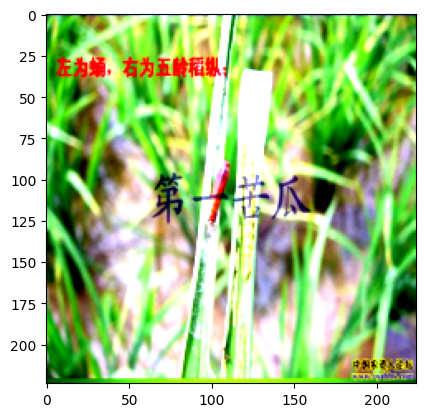

标签: 0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torchvision

# 从 trainloader 获取一个批次的数据
data_iter = iter(trainloader)
images, labels = next(data_iter)

# 将图像从 Tensor 转换为 numpy 数组并进行可视化
def imshow(img):
    img = img / 2 + 0.5  # 反归一化，将图像还原到 [0, 1] 范围
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))  # 转置以符合 (H, W, C) 格式
    plt.show()

# 显示批次中的第一个图像
imshow(torchvision.utils.make_grid(images[1]))
print(f"标签: {labels[1]}")


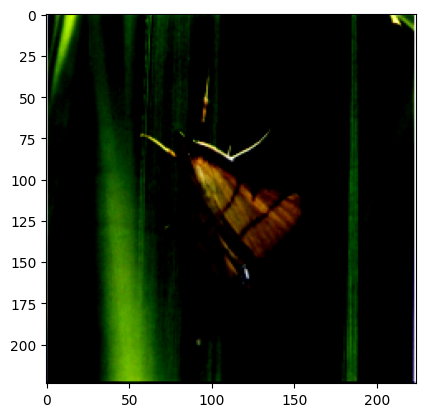

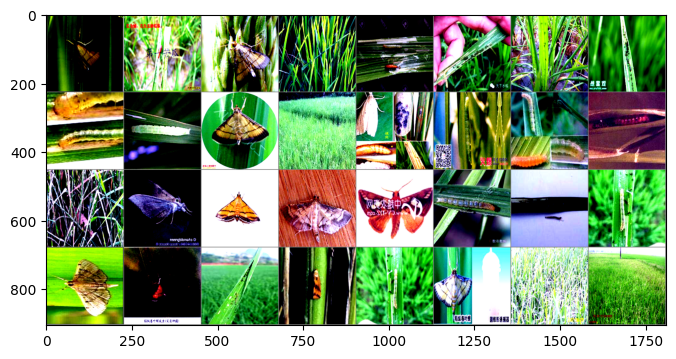

In [ ]:
imshow(images[0])
images[0].shape
plt.figure(figsize=(8,12))
imshow(torchvision.utils.make_grid(images[:32]))

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
# 定义神经网络
class AlexNet(nn.Module):  # 训练 ALexNet
    '''
    5层卷积，3层全连接
    '''
    def __init__(self):
        super(AlexNet, self).__init__()
        # 五个卷积层 输入 32 * 32 * 3
        self.conv1 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=6, kernel_size=3, stride=1, padding=1),   # (32-3+2)/1+1 = 32
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2, padding=0)  # (32-2)/2+1 = 16
        )
        self.conv2 = nn.Sequential(  # 输入 16 * 16 * 6
            nn.Conv2d(in_channels=6, out_channels=16, kernel_size=3, stride=1, padding=1),  # (16-3+2)/1+1 = 16
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2, padding=0)  # (16-2)/2+1 = 8
        )
        self.conv3 = nn.Sequential(  # 输入 8 * 8 * 16
            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1), # (8-3+2)/1+1 = 8
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2, padding=0)  # (8-2)/2+1 = 4
        )
        self.conv4 = nn.Sequential(  # 输入 4 * 4 * 64
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1), # (4-3+2)/1+1 = 4
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2, padding=0)  # (4-2)/2+1 = 2
        )
        self.conv5 = nn.Sequential(  # 输入 2 * 2 * 128
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1),# (2-3+2)/1+1 = 2
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2, padding=0)  # (2-2)/2+1 = 1
        )                            # 最后一层卷积层，输出 1 * 1 * 128
        # 全连接层
        self.dense = nn.Sequential(
            nn.Linear(6272, 120),
            nn.ReLU(),
            nn.Linear(120, 84),
            nn.ReLU(),
            nn.Linear(84, 102)
        )

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.conv4(x)
        x = self.conv5(x)
        x = x.view(x.size()[0],-1)
        x = self.dense(x)
        return x

    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
                if m.bias is not None:
                    nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.Linear):
                nn.init.normal_(m.weight, 0, 0.01)
                nn.init.constant_(m.bias, 0)


net = AlexNet().to(device)

In [ ]:
summary(net,(3,224,224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [-1, 6, 224, 224]             168
              ReLU-2          [-1, 6, 224, 224]               0
         MaxPool2d-3          [-1, 6, 112, 112]               0
            Conv2d-4         [-1, 16, 112, 112]             880
              ReLU-5         [-1, 16, 112, 112]               0
         MaxPool2d-6           [-1, 16, 56, 56]               0
            Conv2d-7           [-1, 32, 56, 56]           4,640
              ReLU-8           [-1, 32, 56, 56]               0
         MaxPool2d-9           [-1, 32, 28, 28]               0
           Conv2d-10           [-1, 64, 28, 28]          18,496
             ReLU-11           [-1, 64, 28, 28]               0
        MaxPool2d-12           [-1, 64, 14, 14]               0
           Conv2d-13          [-1, 128, 14, 14]          73,856
             ReLU-14          [-1, 128,

In [ ]:
print(net)

AlexNet(
  (conv1): Sequential(
    (0): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv3): Sequential(
    (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv4): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv5): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil

In [ ]:
test_x = torch.randn(1,3,224,224).to(device)
test_y = net(test_x)
print(test_y.shape)

torch.Size([1, 102])


In [ ]:
net =AlexNet().to(device)
if device == 'cuda':
    net = nn.DataParallel(net)
    # 当计算图不会改变的时候（每次输入形状相同，模型不改变）的情况下可以提高性能，反之则降低性能
    torch.backends.cudnn.benchmark = True

In [ ]:
import torch.optim as optim

#optimizer = optim.SGD(net.parameters(), lr=1e-1, momentum=0.9, weight_decay=5e-4)
optimizer = torch.optim.SGD(net.parameters(), lr=0.01)


criterion = nn.CrossEntropyLoss()
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', factor=0.5 ,patience = 5,min_lr = 0.000001) # 动态更新学习率
# scheduler = optim.lr_scheduler.MultiStepLR(optimizer, milestones=[75, 150], gamma=0.5)
import time
epoch = 10

In [ ]:
import os
if not os.path.exists('/content/drive/MyDrive/COMP9444_project/model'):
    os.makedirs('/content/drive/MyDrive/COMP9444_project/model')
else:
    print('文件已存在')
save_path = '/content/drive/MyDrive/COMP9444_project/model/AlexNet.pth'

In [ ]:
import os
import torch
import matplotlib.pyplot as plt
import numpy as np
import random
#from tqdm import tqdm # 在脚本中使用较好
from tqdm import tqdm_notebook as tqdm # 在jupyter中使用


def setup_seed(seed):
    np.random.seed(seed)
    random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    # When running on the CuDNN backend, two further options must be set
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    # torch.backends.cudnn.benchmark = True 可以加速卷积的运算
    # Set a fixed value for the hash seed
    os.environ["PYTHONHASHSEED"] = str(seed)
    print(f"Random seed set as {seed}")


def get_mean_and_std(dataset):
    '''Compute the mean and std value of dataset.'''
    dataloader = torch.utils.data.DataLoader(dataset, batch_size=1, shuffle=True, num_workers=2)
    mean = torch.zeros(3)
    std = torch.zeros(3)
    print('==> Computing mean and std..')
    for inputs, targets in dataloader:
        for i in range(3):
            mean[i] += inputs[:,i,:,:].mean()
            std[i] += inputs[:,i,:,:].std()
    mean.div_(len(dataset))
    std.div_(len(dataset))
    return mean, std


def get_acc(outputs, label):
    total = outputs.shape[0]
    probs, pred_y = outputs.data.max(dim=1) # 得到概率
    correct = (pred_y == label).sum().data
    return torch.div(correct, total)


class EarlyStopping:
    """Early stops the training if validation loss doesn't improve after a given patience."""
    def __init__(self, patience=7, verbose=False, delta=0):
        """
        Args:
            patience (int): How long to wait after last time validation loss improved.
                            Default: 7
            verbose (bool): If True, prints a message for each validation loss improvement.
                            Default: False
            delta (float): Minimum change in the monitored quantity to qualify as an improvement.
                            Default: 0
        """
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = np.Inf
        self.delta = delta

    def __call__(self, val_loss, model):
        score = -val_loss
        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
        elif score < self.best_score + self.delta:
            self.counter += 1
            print(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        '''Saves model when validation loss decrease.'''
        if self.verbose:
            print(f'Validation loss decreased ({self.val_loss_min:.6f} --> {val_loss:.6f}).  Saving model ...')
        # torch.save(model.state_dict(), 'checkpoint.pt')	# 这里会存储迄今最优模型的参数
        self.val_loss_min = val_loss

def train(net, trainloader, testloader, epochs, optimizer , criterion, scheduler , path = './model.pth', writer = None ,verbose = False):
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    best_acc = 0
    train_acc_list, test_acc_list = [],[]
    train_loss_list, test_loss_list = [],[]
    lr_list  = []
    for i in range(epochs):
        train_loss = 0
        train_acc = 0
        test_loss = 0
        test_acc = 0
        if torch.cuda.is_available():
            net = net.to(device)
        net.train()
        train_step = len(trainloader)
        with tqdm(total=train_step,desc=f'Train Epoch {i + 1}/{epochs}',postfix=dict,mininterval=0.3) as pbar:
            for step,data in enumerate(trainloader,start=0):
                im,label = data
                im = im.to(device)
                label = label.to(device)

                optimizer.zero_grad()
                # 释放内存
                if hasattr(torch.cuda, 'empty_cache'):
                    torch.cuda.empty_cache()
                # formard
                outputs = net(im)
                loss = criterion(outputs,label)
                # backward
                loss.backward()
                # 更新参数
                optimizer.step()
                # 累计损失
                train_loss += loss.item()
                train_acc += get_acc(outputs,label).item()
                pbar.set_postfix(**{'Train Acc' : train_acc/(step+1),
                                'Train Loss' :train_loss/(step+1)})
                pbar.update(1)
            pbar.close()
        train_loss = train_loss / len(trainloader)
        train_acc = train_acc * 100 / len(trainloader)
        if verbose:
            train_acc_list.append(train_acc)
            train_loss_list.append(train_loss)
        # 记录学习率
        lr = optimizer.param_groups[0]['lr']
        if verbose:
            lr_list.append(lr)
        # 更新学习率
        scheduler.step(train_loss)
        if testloader is not None:
            net.eval()
            test_step = len(testloader)
            with torch.no_grad():
                with tqdm(total=test_step,desc=f'Test Epoch {i + 1}/{epochs}',postfix=dict,mininterval=0.3) as pbar:
                    for step,data in enumerate(testloader,start=0):
                        im,label = data
                        im = im.to(device)
                        label = label.to(device)
                        # 释放内存
                        if hasattr(torch.cuda, 'empty_cache'):
                            torch.cuda.empty_cache()
                        outputs = net(im)
                        loss = criterion(outputs,label)
                        test_loss += loss.item()
                        test_acc += get_acc(outputs,label).item()
                        pbar.set_postfix(**{'Test Acc' : test_acc/(step+1),
                                'Test Loss' :test_loss/(step+1)})
                        pbar.update(1)
                    pbar.close()
                test_loss = test_loss / len(testloader)
                test_acc = test_acc * 100 / len(testloader)
            if verbose:
                test_loss_list.append(test_loss)
                test_acc_list.append(test_acc)
            print(
                'Epoch [{:>3d}/{:>3d}]  Train Loss:{:>.6f}  Train Acc:{:>3.2f}% Test Loss:{:>.6f}  Test Acc:{:>3.2f}%  Learning Rate:{:>.6f}'.format(
                    i + 1, epochs, train_loss, train_acc, test_loss, test_acc,lr))
        else:
            print('Epoch [{:>3d}/{:>3d}]  Train Loss:{:>.6f}  Train Acc:{:>3.2f}%  Learning Rate:{:>.6f}'.format(i+1,epochs,train_loss,train_acc,lr))

        # ====================== 使用 tensorboard ==================
        if writer is not None:
            writer.add_scalars('Loss', {'train': train_loss,
                                    'test': test_loss}, i+1)
            writer.add_scalars('Acc', {'train': train_acc ,
                                   'test': test_acc}, i+1)
            writer.add_scalar('Learning Rate',lr,i+1)
        # =========================================================
        # 如果取得更好的准确率，就保存模型
        if test_acc > best_acc:
            torch.save(net,path)
            best_acc = test_acc
    Acc = {}
    Loss = {}
    Acc['train_acc'] = train_acc_list
    Acc['test_acc'] = test_acc_list
    Loss['train_loss'] = train_loss_list
    Loss['test_loss'] = test_loss_list
    Lr = lr_list
    return Acc, Loss, Lr

def plot_history(epochs, Acc, Loss, lr):
    plt.rcParams['figure.figsize'] = (12.0, 8.0)  # set default size of plots
    plt.rcParams['image.interpolation'] = 'nearest'
    plt.rcParams['image.cmap'] = 'gray'

    epoch_list = range(1,epochs + 1)
    plt.plot(epoch_list, Loss['train_loss'])
    plt.plot(epoch_list, Loss['test_loss'])
    plt.xlabel('epoch')
    plt.ylabel('Loss Value')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    plt.plot(epoch_list, Acc['train_acc'])
    plt.plot(epoch_list, Acc['test_acc'])
    plt.xlabel('epoch')
    plt.ylabel('Acc Value')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    plt.plot(epoch_list, lr)
    plt.xlabel('epoch')
    plt.ylabel('Train LR')
    plt.show()

In [ ]:
Acc, Loss, Lr = train(net, trainloader, testloader, epoch, optimizer, criterion, scheduler, save_path, verbose = True)

<ipython-input-41-007fbcc73955>:103: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  with tqdm(total=train_step,desc=f'Train Epoch {i + 1}/{epochs}',postfix=dict,mininterval=0.3) as pbar:


Train Epoch 1/15:   0%|          | 0/79 [00:00<?, ?it/s<class 'dict'>]

<ipython-input-41-007fbcc73955>:142: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  with tqdm(total=test_step,desc=f'Test Epoch {i + 1}/{epochs}',postfix=dict,mininterval=0.3) as pbar:


Test Epoch 1/15:   0%|          | 0/79 [00:00<?, ?it/s<class 'dict'>]

Epoch [  1/ 15]  Train Loss:6.081596  Train Acc:6.75% Test Loss:5.984487  Test Acc:3.31%  Learning Rate:0.010000


Train Epoch 2/15:   0%|          | 0/79 [00:00<?, ?it/s<class 'dict'>]

Test Epoch 2/15:   0%|          | 0/79 [00:00<?, ?it/s<class 'dict'>]

Epoch [  2/ 15]  Train Loss:5.433758  Train Acc:6.69% Test Loss:5.498740  Test Acc:3.31%  Learning Rate:0.010000


Train Epoch 3/15:   0%|          | 0/79 [00:00<?, ?it/s<class 'dict'>]

Test Epoch 3/15:   0%|          | 0/79 [00:00<?, ?it/s<class 'dict'>]

Epoch [  3/ 15]  Train Loss:5.061948  Train Acc:6.69% Test Loss:5.219395  Test Acc:3.45%  Learning Rate:0.010000


Train Epoch 4/15:   0%|          | 0/79 [00:00<?, ?it/s<class 'dict'>]

Test Epoch 4/15:   0%|          | 0/79 [00:00<?, ?it/s<class 'dict'>]

Epoch [  4/ 15]  Train Loss:4.816397  Train Acc:6.69% Test Loss:5.033671  Test Acc:3.31%  Learning Rate:0.010000


Train Epoch 5/15:   0%|          | 0/79 [00:00<?, ?it/s<class 'dict'>]

Test Epoch 5/15:   0%|          | 0/79 [00:00<?, ?it/s<class 'dict'>]

Epoch [  5/ 15]  Train Loss:4.632214  Train Acc:6.69% Test Loss:4.888945  Test Acc:3.31%  Learning Rate:0.010000


Train Epoch 6/15:   0%|          | 0/79 [00:00<?, ?it/s<class 'dict'>]

Test Epoch 6/15:   0%|          | 0/79 [00:00<?, ?it/s<class 'dict'>]

Epoch [  6/ 15]  Train Loss:4.479535  Train Acc:6.69% Test Loss:4.773442  Test Acc:3.38%  Learning Rate:0.010000


Train Epoch 7/15:   0%|          | 0/79 [00:00<?, ?it/s<class 'dict'>]

Test Epoch 7/15:   0%|          | 0/79 [00:00<?, ?it/s<class 'dict'>]

Epoch [  7/ 15]  Train Loss:4.341455  Train Acc:6.75% Test Loss:4.679972  Test Acc:3.31%  Learning Rate:0.010000


Train Epoch 8/15:   0%|          | 0/79 [00:00<?, ?it/s<class 'dict'>]

Test Epoch 8/15:   0%|          | 0/79 [00:00<?, ?it/s<class 'dict'>]

Epoch [  8/ 15]  Train Loss:4.217574  Train Acc:6.69% Test Loss:4.604477  Test Acc:3.31%  Learning Rate:0.010000


Train Epoch 9/15:   0%|          | 0/79 [00:00<?, ?it/s<class 'dict'>]

Test Epoch 9/15:   0%|          | 0/79 [00:00<?, ?it/s<class 'dict'>]

KeyboardInterrupt: 

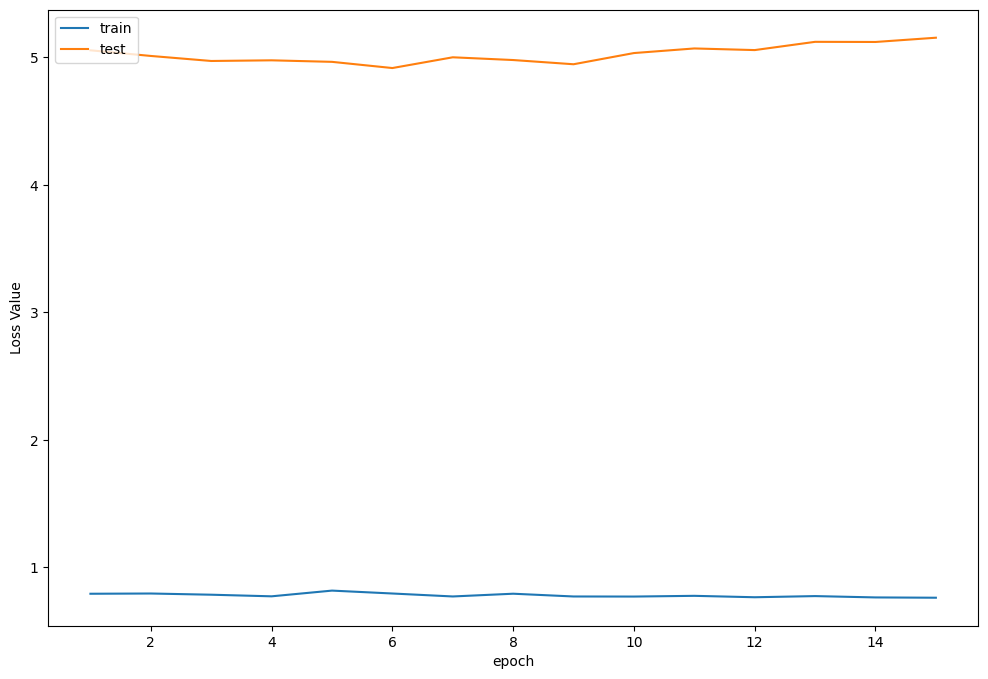

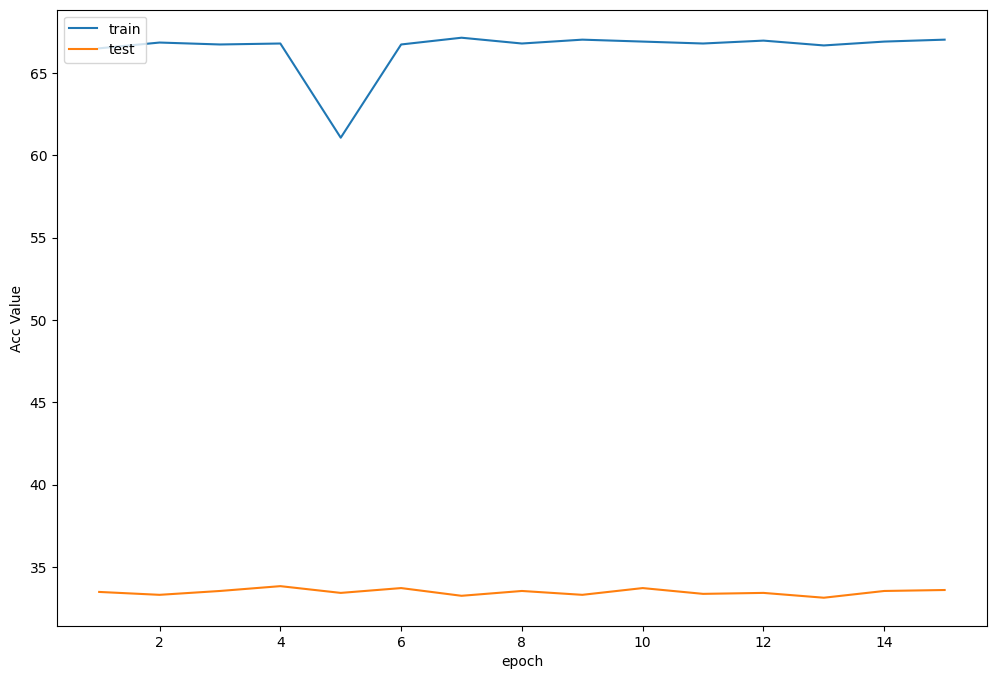

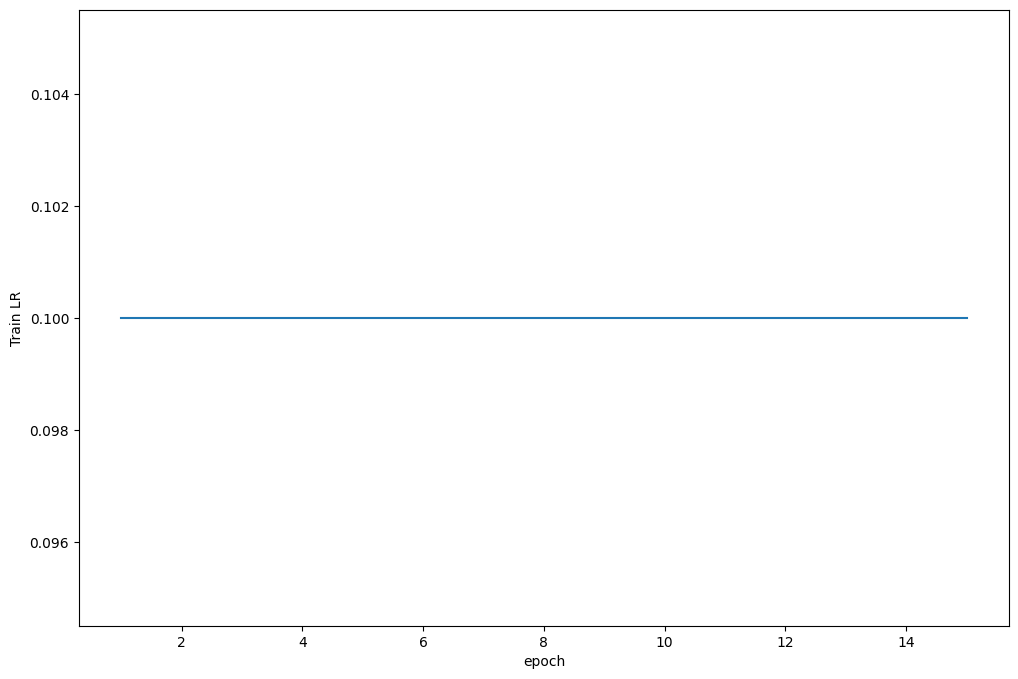

In [ ]:
plot_history(epoch ,Acc, Loss, Lr)

In [ ]:
from sklearn.model_selection import StratifiedKFold
import torch
from torch.utils.data import Subset, DataLoader
from torchvision import transforms

# 定义数据集和预处理
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # 根据您的需要调整
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.5140, 0.5406, 0.3882), (0.1888, 0.1875, 0.1879))
])
dataset = InsectDataset('/content/drive/Othercomputers/我的计算机/Classification/ip102_v1.1/ip102_v1.1/train.txt',
                        '/content/drive/Othercomputers/我的计算机/Classification/ip102_v1.1/ip102_v1.1/images',
                        transform=transform,limit = 50000)

# 计算类别权重
from collections import Counter
import numpy as np

from torch.utils.data import DataLoader

# 创建 DataLoader，仅用于提取标签，不需要打乱
label_loader = DataLoader(dataset, batch_size=256, shuffle=False, num_workers=4)

# 批量提取标签
labels = []
for _, batch_labels in label_loader:
    labels.extend(batch_labels.numpy())  # 将标签转换为 numpy 数组并添加到列表中

# 确保标签是一个纯 Python 列表
labels = list(labels)

label_counts = Counter(labels)
class_weights = torch.tensor([1.0 / label_counts[i] for i in range(len(label_counts))], dtype=torch.float).to('cuda')

# 定义 Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', factor=0.5 ,patience = 5,min_lr = 0.000001) # 动态更新学习率
# 交叉验证
# for fold, (train_idx, val_idx) in enumerate(skf.split(dataset, labels)):
#     print(f"Fold {fold + 1}")

#     # 创建训练和验证子集
#     train_subset = Subset(dataset, train_idx)
#     val_subset = Subset(dataset, val_idx)

#     # 创建 DataLoader
#     train_loader = DataLoader(train_subset, batch_size=64, shuffle=True)
#     val_loader = DataLoader(val_subset, batch_size=64, shuffle=False)

#     # 定义模型、优化器、损失函数
#     model = AlexNet().to('cuda')  # 确保模型在 GPU 上
#     optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
#     criterion = torch.nn.CrossEntropyLoss(weight=class_weights)

#     # 训练模型
#     # 修改 train() 调用，将 scheduler 放在关键字参数前面
#     Acc, Loss, Lr = train(model, train_loader, val_loader, epochs=10, optimizer=optimizer, criterion=criterion, scheduler=scheduler, path=f'model_fold_{fold + 1}.pth', verbose=True)


#     # 这里您可以保存或记录每个折的结果


from imblearn.over_sampling import RandomOverSampler

# 导入所需的库
from torch.utils.data import TensorDataset

# 交叉验证
for fold, (train_idx, val_idx) in enumerate(skf.split(dataset, labels)):
    print(f"Fold {fold + 1}")

    # 创建训练和验证子集
    train_subset = Subset(dataset, train_idx)
    val_subset = Subset(dataset, val_idx)

    # 提取训练子集的样本和标签
    train_data = [train_subset[i][0] for i in range(len(train_subset))]
    train_labels = [train_subset[i][1] for i in range(len(train_subset))]

    # 转换为 NumPy 数组
    train_data_np = np.array([d.numpy() for d in train_data]).reshape(len(train_data), -1)
    train_labels_np = np.array(train_labels)

    # 使用 RandomOverSampler 进行过采样
    ros = RandomOverSampler(random_state=42)
    data_resampled, labels_resampled = ros.fit_resample(train_data_np, train_labels_np)

    # 转换为张量
    data_resampled = torch.tensor(data_resampled).view(-1, 3, 224, 224)
    labels_resampled = torch.tensor(labels_resampled)

    # 定义数据增强变换
    augment_transform = transforms.Compose([
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(10),
        transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),
        transforms.ToTensor(),
        transforms.Normalize((0.5140, 0.5406, 0.3882), (0.1888, 0.1875, 0.1879))
    ])

    # 创建过采样后的数据集和加载器
    augmented_dataset = TensorDataset(data_resampled, labels_resampled)
    train_loader = DataLoader(augmented_dataset, batch_size=64, shuffle=True, num_workers=4)
    val_loader = DataLoader(val_subset, batch_size=64, shuffle=False, num_workers=4)

    # 定义模型、优化器、损失函数
    model = AlexNet().to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    criterion = torch.nn.CrossEntropyLoss(weight=class_weights)

    # 确保数据和模型在 GPU 上
    for data in train_loader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        break  # 测试一次移动到 GPU 即可

    # 训练模型
    Acc, Loss, Lr = train(model, train_loader, val_loader, epochs=10, optimizer=optimizer, criterion=criterion, scheduler=scheduler, path=f'model_fold_{fold + 1}.pth', verbose=True)

    print(f"Fold {fold + 1} 完成")


Fold 1
